In [1]:
#Load python packages
import pandas as pd
import numpy as np

#Import UFC Fight data, create new variables (columns)
odds_data = pd.read_csv('/Users/gregzaimes/Desktop/UFC/UFC Odds.csv', engine = "python")
df = pd.read_csv('/Users/gregzaimes/Desktop/UFC/UFC Fight Data.csv')
df["Body_Attempt"] = df["B_avg_BODY_att"]/df["R_avg_BODY_att"]
df["Body_Landed"]=df["B_avg_BODY_landed"]/df["R_avg_BODY_landed"]
df["Clinch_Attempt"]=df["B_avg_CLINCH_att"]/df["R_avg_CLINCH_att"]
df["Clinch_Land"]=df["B_avg_CLINCH_landed"]/df["R_avg_CLINCH_landed"]
df["Distance_Attempt"]=df["B_avg_DISTANCE_att"]/df["R_avg_DISTANCE_att"]
df["Distance_Landed"]=df["B_avg_DISTANCE_landed"]/df["R_avg_DISTANCE_landed"]
df["Ground_Attempt"]=df["B_avg_GROUND_att"]/df["R_avg_GROUND_att"]
df["Ground_Landed"]=df["B_avg_GROUND_landed"]/df["R_avg_GROUND_landed"]
df["Head_Attempt"]=df["B_avg_HEAD_att"]/df["R_avg_HEAD_att"]
df["Head_Landed"]=df["B_avg_HEAD_landed"]/df["R_avg_HEAD_landed"]
df["KD_avg"]=df["B_avg_KD"]/df["R_avg_KD"]
df["Leg_Attempt"]=df["B_avg_LEG_att"]/df["R_avg_LEG_att"]
df["Leg_Landed"]=df["B_avg_LEG_landed"]/df["R_avg_LEG_landed"]
df["Pass_Avg"]=df["B_avg_PASS"]/df["R_avg_PASS"]
df["Rev_Avg"]=df["B_avg_REV"]/df["R_avg_PASS"]
df["Sig_Str_Att"]=df["B_avg_SIG_STR_att"]/df["R_avg_SIG_STR_att"]
df["Sig_Str_Landed"]=df["B_avg_SIG_STR_landed"]/df["R_avg_SIG_STR_landed"]
df["Sig_Str_Pct"]=df["B_avg_SIG_STR_pct"]/df["R_avg_SIG_STR_pct"]
df["Sub_Att"]=df["B_avg_SUB_ATT"]/df["R_avg_SUB_ATT"]
df["TD_Att"]=df["B_avg_TD_att"]/df["R_avg_TD_att"]
df["TD_Landed"]=df["B_avg_TD_landed"]/df["R_avg_TD_landed"]
df["TD_Pct"]=df["B_avg_TD_pct"]/df["R_avg_TD_pct"]
df["Total_Str_Att"]=df["B_avg_TOTAL_STR_att"]/df["R_avg_TOTAL_STR_att"]
df["Total_Str_Landed"]=df["B_avg_TOTAL_STR_landed"]/df["R_avg_TOTAL_STR_landed"]

# Merge UFC Fighting and Odds Dataset
df = df.merge(odds_data, left_on = ["R_fighter", "B_fighter",'date','weight_class'], right_on = ["R_fighter", "B_fighter",'date','weight_class'], how = "left")

# Drop and replace any erroneous values (e.g. NaN/Infinity)
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
print(df)

                 R_fighter              B_fighter               Referee  \
0             Henry Cejudo          Marlon Moraes          Marc Goddard   
2            Tony Ferguson         Donald Cerrone       Dan Miragliotta   
8            Ricardo Lamas          Calvin Kattar       Dan Miragliotta   
13    Alexander Gustafsson          Anthony Smith          Marc Goddard   
14             Jimi Manuwa       Aleksandar Rakic          Kevin Sataki   
16          Damir Hadzovic        Christos Giagos         Rich Mitchell   
20              Stevie Ray        Leonardo Santos          Marc Goddard   
25        Rafael Dos Anjos              Kevin Lee       Dan Miragliotta   
29        Charles Oliveira              Nik Lentz  Todd Ronald Anderson   
36            Zak Cummings           Trevin Giles  Todd Ronald Anderson   
38          Rose Namajunas        Jessica Andrade          Marc Goddard   
40               Jose Aldo  Alexander Volkanovski          Marc Goddard   
41            Thiago Alve

In [2]:
# Examine the number of fights for each weight class
df_agg = df.groupby(["weight_class"])['B_avg_SIG_STR_pct'].count()
print(df_agg)

weight_class
Bantamweight             87
Catch Weight              4
Featherweight           153
Flyweight                59
Heavyweight             108
Light Heavyweight       139
Lightweight             292
Middleweight            179
Welterweight            281
Women's Bantamweight     14
Women's Flyweight         3
Women's Strawweight      12
Name: B_avg_SIG_STR_pct, dtype: int64


In [9]:
#Import python package
from sklearn.model_selection import train_test_split

# Choose one of the following weight classes to subset the UFC dataset
# Looking at Welterweight as it has the highest volume of data out of the weight classes
df_sub = df[(df["weight_class"] == "Lightweight") | (df["weight_class"] == "Middleweight") | (df["weight_class"] == "Welterweight") | (df["weight_class"] == "Featherweight")]
# df_sub = df[(df["weight_class"] == "Bantamweight")]
# df_sub = df[(df["weight_class"] == "Featherweight")]
# df_sub= df[(df["weight_class"] == "Welterweight")]

# Set the data and target variables
data = df_sub[["B_current_lose_streak","B_current_win_streak","B_avg_BODY_att","B_avg_BODY_landed","B_avg_CLINCH_att","B_avg_CLINCH_landed","B_avg_DISTANCE_att","B_avg_DISTANCE_landed","B_avg_GROUND_att","B_avg_GROUND_landed","B_avg_HEAD_att","B_avg_HEAD_landed","B_avg_KD","B_avg_LEG_att","B_avg_LEG_landed","B_avg_PASS","B_avg_REV","B_avg_SIG_STR_att","B_avg_SIG_STR_landed","B_avg_SIG_STR_pct","B_avg_SUB_ATT","B_avg_TD_att","B_avg_TD_landed","B_avg_TD_pct","B_avg_TOTAL_STR_att","B_avg_TOTAL_STR_landed","B_longest_win_streak","B_losses","B_avg_opp_BODY_att","B_avg_opp_BODY_landed","B_avg_opp_CLINCH_att","B_avg_opp_CLINCH_landed","B_avg_opp_DISTANCE_att","B_avg_opp_DISTANCE_landed","B_avg_opp_GROUND_att","B_avg_opp_GROUND_landed","B_avg_opp_HEAD_att","B_avg_opp_HEAD_landed","B_avg_opp_KD","B_avg_opp_LEG_att","B_avg_opp_LEG_landed","B_avg_opp_PASS","B_avg_opp_REV","B_avg_opp_SIG_STR_att","B_avg_opp_SIG_STR_landed","B_avg_opp_SIG_STR_pct","B_avg_opp_SUB_ATT","B_avg_opp_TD_att","B_avg_opp_TD_landed","B_avg_opp_TD_pct","B_avg_opp_TOTAL_STR_att","B_avg_opp_TOTAL_STR_landed","B_total_rounds_fought","B_total_time_fought(seconds)","B_total_title_bouts","B_win_by_Decision_Majority","B_win_by_Decision_Split","B_win_by_Decision_Unanimous","B_win_by_KO/TKO","B_win_by_Submission","B_win_by_TKO_Doctor_Stoppage","B_wins","R_current_lose_streak","R_current_win_streak","R_avg_BODY_att","R_avg_BODY_landed","R_avg_CLINCH_att","R_avg_CLINCH_landed","R_avg_DISTANCE_att","R_avg_DISTANCE_landed","R_avg_GROUND_att","R_avg_GROUND_landed","R_avg_HEAD_att","R_avg_HEAD_landed","R_avg_KD","R_avg_LEG_att","R_avg_LEG_landed","R_avg_PASS","R_avg_REV","R_avg_SIG_STR_att","R_avg_SIG_STR_landed","R_avg_SIG_STR_pct","R_avg_SUB_ATT","R_avg_TD_att","R_avg_TD_landed","R_avg_TD_pct","R_avg_TOTAL_STR_att","R_avg_TOTAL_STR_landed","R_longest_win_streak","R_losses","R_avg_opp_BODY_att","R_avg_opp_BODY_landed","R_avg_opp_CLINCH_att","R_avg_opp_CLINCH_landed","R_avg_opp_DISTANCE_att","R_avg_opp_DISTANCE_landed","R_avg_opp_GROUND_att","R_avg_opp_GROUND_landed","R_avg_opp_HEAD_att","R_avg_opp_HEAD_landed","R_avg_opp_KD","R_avg_opp_LEG_att","R_avg_opp_LEG_landed","R_avg_opp_PASS","R_avg_opp_REV","R_avg_opp_SIG_STR_att","R_avg_opp_SIG_STR_landed","R_avg_opp_SIG_STR_pct","R_avg_opp_SUB_ATT","R_avg_opp_TD_att","R_avg_opp_TD_landed","R_avg_opp_TD_pct","R_avg_opp_TOTAL_STR_att","R_avg_opp_TOTAL_STR_landed","R_total_rounds_fought","R_total_time_fought(seconds)","R_total_title_bouts","R_win_by_Decision_Majority","R_win_by_Decision_Split","R_win_by_Decision_Unanimous","R_win_by_KO/TKO","R_win_by_Submission","R_win_by_TKO_Doctor_Stoppage","R_wins","R_odds", "B_odds"]]

df_columns = data.columns.values.tolist()
target = df_sub["WinnerNum"]

# Convert the 'data' and target dataframes into numpy arrays. 
# This is the required format for KFold cross validation
data_numpy = data.to_numpy()
target_numpy = target.to_numpy()


In [ ]:
# Import python package
from sklearn.preprocessing import RobustScaler

# Scale UFC fight data using 'robust' scaler
# Currently, the robust scaler is scaling the ENTIRE dataset.
# Additional work is needed to apply the robust scaler to individual columns of the dataset
robust = RobustScaler()
data_numpy_robust = robust.fit_transform(data_numpy)


# Import python package
from sklearn.preprocessing import StandardScaler

# Unfinished - This needs more work
scaler = StandardScaler()
data_numpy_standard_scaler = scaler.fit_transform(data_numpy)

# Import python package
from sklearn.preprocessing import MinMaxScaler

# Unfinished - This needs more work
minmax = MinMaxScaler()
data_numpy_minmax = minmax.fit_transform(data_numpy)


# Import python package
from sklearn.preprocessing import Normalizer

# Unfinished - This needs more work
norm = Normalizer()
data_numpy_norm = norm.fit_transform(data_numpy)

In [26]:
# Import python packages
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn import metrics

# Parameterize the number of KFolds. For now, set the number of folds equal to 10
rkf = RepeatedKFold(n_splits=10, n_repeats=100, random_state=1234)

# This splits the data into the number of specified folds
rkf.get_n_splits(data_numpy)

# Set up a blank list and DataFrame, for which we will append accuracy scores 
# in the subsequent For-Loop
accuracy = []
all_scores = pd.DataFrame()

# Create For-Loop to loop through the cross folds of the data-set
for train_index, test_index in rkf.split(data_numpy):
    X_train, X_test = data_numpy[train_index], data_numpy[test_index]
    y_train, y_test = target_numpy[train_index], target_numpy[test_index]

    # Choose the preferred classifier and associated parameters (e.g. max_iter, C, etc.)
    # Currently only 3 are loaded, LinearSVC, LogReg, and Ridge--we can add others
    # clf = LinearSVC(max_iter=1000, C = 100)
    #clf = LogisticRegression(solver = "lbfgs", C = 10, max_iter = 1000)
    clf = RidgeClassifier(normalize = True)
    clf.fit(X_train,y_train) # Fit the classifer based on X_train, and y_train 
    y_pred=clf.predict(X_test) # Make predictions based on X_test set
    score = metrics.accuracy_score(y_test, y_pred) # Determine the Model accuracy 
    accuracy.append(score) # Append the accuracy scores to the 'accuracy' list
all_scores["Folds"] = accuracy # Port the accuracy scores into the all_scores DataFrame


In [49]:
# Print the Classifier Accuracies across the KFolds
print(all_scores)
print("Average Accuracy: " + str(all_scores["Folds"].mean()))

[  1.82694224e-02  -2.39894215e-02  -6.31377712e-04  -1.90516023e-03
  -9.19404180e-04  -1.84116089e-03  -2.39853119e-04   2.26716563e-04
  -2.53070196e-03  -3.01799386e-03  -4.50670894e-04  -9.98102493e-05
   1.60917430e-02  -8.54486737e-04  -3.77003489e-04   3.87612058e-03
  -3.80781079e-02  -3.43861489e-04  -2.20217379e-04   1.06196771e-01
   2.24076040e-02  -1.27246003e-02  -1.68745457e-02  -1.33345227e-02
  -2.50449548e-04   5.37829951e-05  -1.78692397e-03   2.16861110e-03
   1.16835885e-03   4.48000360e-03   1.57303995e-03   4.85977682e-03
  -1.22089840e-04  -6.14112234e-04   1.79435477e-03   4.42144002e-03
  -1.51456353e-05   8.47905620e-04   2.34241606e-02  -1.92525353e-03
  -5.06651540e-03  -1.06373694e-02   1.64589384e-02  -2.20780280e-05
   2.93175638e-04   1.06916299e-01   4.34495300e-02  -4.61249487e-03
  -9.87616470e-04   9.80802420e-02   1.41090082e-04   8.69005532e-04
  -5.05895611e-04  -4.13888690e-05   1.54716610e-02  -1.94392918e-01
   4.59586591e-02  -1.22653706e-02

array([  1.82694224e-02,  -2.39894215e-02,  -6.31377712e-04,
        -1.90516023e-03,  -9.19404180e-04,  -1.84116089e-03,
        -2.39853119e-04,   2.26716563e-04,  -2.53070196e-03,
        -3.01799386e-03,  -4.50670894e-04,  -9.98102493e-05,
         1.60917430e-02,  -8.54486737e-04,  -3.77003489e-04,
         3.87612058e-03,  -3.80781079e-02,  -3.43861489e-04,
        -2.20217379e-04,   1.06196771e-01,   2.24076040e-02,
        -1.27246003e-02,  -1.68745457e-02,  -1.33345227e-02,
        -2.50449548e-04,   5.37829951e-05,  -1.78692397e-03,
         2.16861110e-03,   1.16835885e-03,   4.48000360e-03,
         1.57303995e-03,   4.85977682e-03,  -1.22089840e-04,
        -6.14112234e-04,   1.79435477e-03,   4.42144002e-03,
        -1.51456353e-05,   8.47905620e-04,   2.34241606e-02,
        -1.92525353e-03,  -5.06651540e-03,  -1.06373694e-02,
         1.64589384e-02,  -2.20780280e-05,   2.93175638e-04,
         1.06916299e-01,   4.34495300e-02,  -4.61249487e-03,
        -9.87616470e-04,

/Users/gregzaimes/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


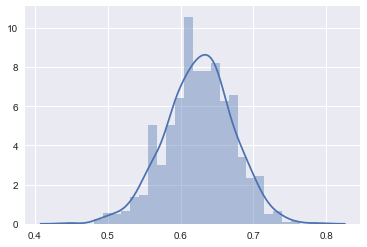

In [12]:
# Import Python Modules
import seaborn as sns
import matplotlib.pyplot as plt

# Use Seaborn to Create a histogram of the Accuracies between the KFolds
%matplotlib inline 
sns.distplot(accuracy)

In [13]:
# Create dictionary to map Feature Weights to Feature Metadata
coef_dict = {}
for coef, feat in zip(abs(clf.coef_[0]),df_columns):
    coef_dict[feat] = coef 
    
# Pull out and sort the Feature Weights of the Classifier, in ascending order
feature_weights_sorted = dict(sorted(coef_dict.items(), key=lambda x: x[1], reverse = True))
feature_weights_sorted

{'B_win_by_Decision_Majority': 0.19439291809484352,
 'R_avg_opp_KD': 0.15728867263077859,
 'B_avg_opp_SIG_STR_pct': 0.10691629946158139,
 'B_avg_SIG_STR_pct': 0.10619677148591,
 'R_win_by_TKO_Doctor_Stoppage': 0.10608824113351713,
 'R_avg_opp_SIG_STR_pct': 0.10372213161408431,
 'B_avg_opp_TD_pct': 0.098080242016622882,
 'B_win_by_Decision_Split': 0.045958659136085128,
 'R_avg_opp_TD_pct': 0.044820613952430713,
 'B_avg_opp_SUB_ATT': 0.043449530019147815,
 'R_avg_opp_REV': 0.041680036829840582,
 'B_win_by_TKO_Doctor_Stoppage': 0.040527719174377849,
 'B_avg_REV': 0.038078107882855407,
 'R_avg_PASS': 0.03357006214305773,
 'R_avg_opp_PASS': 0.026975655876517922,
 'R_win_by_Decision_Split': 0.024506718179232407,
 'B_current_win_streak': 0.023989421454696722,
 'B_avg_opp_KD': 0.023424160553510195,
 'R_avg_KD': 0.023285549539024217,
 'B_avg_SUB_ATT': 0.022407603952462163,
 'R_avg_SIG_STR_pct': 0.021409075003319487,
 'B_current_lose_streak': 0.018269422380004108,
 'R_current_win_streak': 0.0172

In [14]:
# Top 50 feature weights
list(feature_weights_sorted.keys())[0:10]

['B_win_by_Decision_Majority',
 'R_avg_opp_KD',
 'B_avg_opp_SIG_STR_pct',
 'B_avg_SIG_STR_pct',
 'R_win_by_TKO_Doctor_Stoppage',
 'R_avg_opp_SIG_STR_pct',
 'B_avg_opp_TD_pct',
 'B_win_by_Decision_Split',
 'R_avg_opp_TD_pct',
 'B_avg_opp_SUB_ATT']